

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>


## Evaluating the Impact of Dimensionality Reduction on DBSCAN Clustering of High-Dimensional Seismic Attributes

#### Yining Huang
#### Petroleum and Geosystem Engineering, The University of Texas at Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences

_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Elnara Rustamzade, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/elnara-rustamzade/)


### Executive Summary

High-dimensional data often causes problems in machine learning models, a challenge known as the curse of dimensionality. This project explores how this issue affects the DBSCAN clustering algorithm when applied to seismic data. I used public seismic datasets from USGS and SEG, applied different dimensionality reduction techniques (PCA, t-SNE, UMAP), and compared DBSCAN’s performance before and after reducing dimensions. The results showed that dimensionality reduction helps DBSCAN work better by making patterns easier to find, and I recommend using PCA or UMAP before clustering high-dimensional seismic data.

### Import Package

In [52]:
import numpy as np                    # for numerical operations and working with arrays
import pandas as pd                  # for data handling and analysis
import matplotlib.pyplot as plt      # for data visualization
import seaborn as sns                # for more advanced and styled plots
from sklearn.decomposition import PCA        # for dimensionality reduction (PCA)
from sklearn.manifold import TSNE            # for dimensionality reduction (t-SNE)
import umap                          # for dimensionality reduction (UMAP)
from sklearn.preprocessing import StandardScaler  # for scaling the data
from sklearn.cluster import DBSCAN            # for clustering
from sklearn.cluster import KMeans            # for clustering
from sklearn.preprocessing import StandardScaler # for clustering
from sklearn.metrics import silhouette_score # for clustering

### Functions

#### plot_correlation_matrix(df, size=10):

Plots a heatmap of the correlation matrix for a given DataFrame. This helps identify relationships between features, which is useful before applying dimensionality reduction.

In [6]:
#Plots a heatmap of the correlation matrix for the given dataframe.
def plot_correlation_matrix(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr, vmin=-1.0, vmax=1.0)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(im)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

#### plot_reduction_result(X, title):

Plots 2D scatter plots of reduced data (e.g., from PCA, t-SNE, or UMAP). This allows visual inspection of structure in the lower-dimensional space.

In [8]:
#Plots a 2D scatter plot for reduced data (e.g., PCA, t-SNE, UMAP).
def plot_reduction_result(X, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

#### run_dbscan(X, eps=0.5, min_samples=5):

Applies the DBSCAN clustering algorithm to the input data and returns the model and cluster labels.

In [10]:
#Applies DBSCAN clustering and returns fitted model and labels.
def run_dbscan(X, eps=0.5, min_samples=5):
    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(X)
    return model, labels

#### plot_clusters_2d(X, labels, title='DBSCAN Clustering'):

Plots clustering results on 2D data using different colors for each cluster. Noise points (label -1) are shown separately.

In [12]:
#Plots DBSCAN clustering results on 2D data.
def plot_clusters_2d(X, labels, title='DBSCAN Clustering'):
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    for label in unique_labels:
        mask = labels == label
        plt.scatter(X[mask, 0], X[mask, 1], label=f'Cluster {label}' if label != -1 else 'Noise')
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

### Load Data
In this section, we load the seismic dataset and check its structure and quality. We inspect data types, look for missing values, and review summary statistics to understand the data before applying any machine learning techniques. We also plot a correlation matrix to see how different features relate to each other. This helps identify which features might be redundant or highly related, which is useful for dimensionality reduction later.

In [49]:
data = pd.read_csv("https://raw.githubusercontent.com/Lizzzzzzzzzzzz/MLProject/refs/heads/main/query.csv")

In [47]:
# Show basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             200 non-null    object 
 1   latitude         200 non-null    float64
 2   longitude        200 non-null    float64
 3   depth            200 non-null    float64
 4   mag              200 non-null    float64
 5   magType          200 non-null    object 
 6   nst              200 non-null    int64  
 7   gap              200 non-null    float64
 8   dmin             200 non-null    float64
 9   rms              200 non-null    float64
 10  net              200 non-null    object 
 11  id               200 non-null    object 
 12  updated          200 non-null    object 
 13  place            200 non-null    object 
 14  type             200 non-null    object 
 15  horizontalError  170 non-null    float64
 16  depthError       200 non-null    float64
 17  magError        

In [43]:
# Display the first few rows
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-04-04T15:37:40.370Z,38.1385,-121.847167,27.1600,2.92,ml,150,46.0,0.03748,0.26,...,2025-04-04T19:32:43.249Z,"13 km NNE of Pittsburg, CA",earthquake,0.240000,0.410000,0.246,77.0,reviewed,nc,nc
1,2025-04-04T11:58:33.974Z,31.6060,-103.979000,9.0863,2.70,ml,22,45.0,0.00000,0.10,...,2025-04-04T15:53:59.299Z,"36 km NNW of Toyah, Texas",earthquake,0.406818,0.369626,0.200,13.0,reviewed,tx,tx
2,2025-04-04T11:17:39.479Z,31.6670,-104.365000,6.8176,2.80,ml,23,69.0,0.10000,0.20,...,2025-04-04T11:32:12.302Z,"56 km S of Whites City, New Mexico",earthquake,0.718678,0.723736,0.100,13.0,reviewed,tx,tx
3,2025-04-04T09:23:13.778Z,31.5250,-104.007000,6.7151,2.60,ml,16,59.0,0.00000,0.10,...,2025-04-04T14:10:43.327Z,"30 km NW of Toyah, Texas",earthquake,0.858231,0.568285,0.100,12.0,reviewed,tx,tx
4,2025-04-04T09:10:59.140Z,35.6760,-97.389000,6.6500,2.76,ml,95,26.0,0.00000,0.12,...,2025-04-04T17:37:38.240Z,"5 km W of Arcadia, Oklahoma",earthquake,NaN,0.200000,0.220,45.0,reviewed,ok,ok


In [17]:
# Check for missing values
data.isnull().sum()

time                0
latitude            0
longitude           0
depth               0
mag                 0
magType             0
nst                 0
gap                 0
dmin                0
rms                 0
net                 0
id                  0
updated             0
place               0
type                0
horizontalError    30
depthError          0
magError           10
magNst              3
status              0
locationSource      0
magSource           0
dtype: int64

In [18]:
# Get summary statistics
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,170.000000,200.000000,190.000000,197.000000
mean,36.996235,-112.909092,8.553981,2.850300,44.78000,89.652250,0.258751,0.258660,1.087138,2.603059,0.151246,54.375635
std,4.277750,9.373593,6.620939,0.362943,37.49374,65.725795,0.321355,0.206228,1.097544,4.541107,0.089355,61.865811
min,28.893000,-124.968000,-2.940000,2.500000,4.00000,11.000000,0.000000,0.010000,0.070000,0.110000,0.000000,3.000000
25%,32.637150,-120.113116,5.226225,2.600000,18.75000,45.750000,0.044045,0.111350,0.242500,0.472493,0.090000,13.000000
50%,36.736250,-116.267083,7.425000,2.710000,33.00000,65.000000,0.103750,0.180000,0.640771,0.917317,0.147000,32.000000
75%,40.230793,-104.334000,10.000000,2.982500,58.25000,118.000000,0.361175,0.347500,1.647500,2.532140,0.200000,79.000000
max,48.472500,-75.059500,45.970000,4.180000,228.00000,311.000000,1.519000,1.040000,4.370000,31.610000,0.536000,360.000000


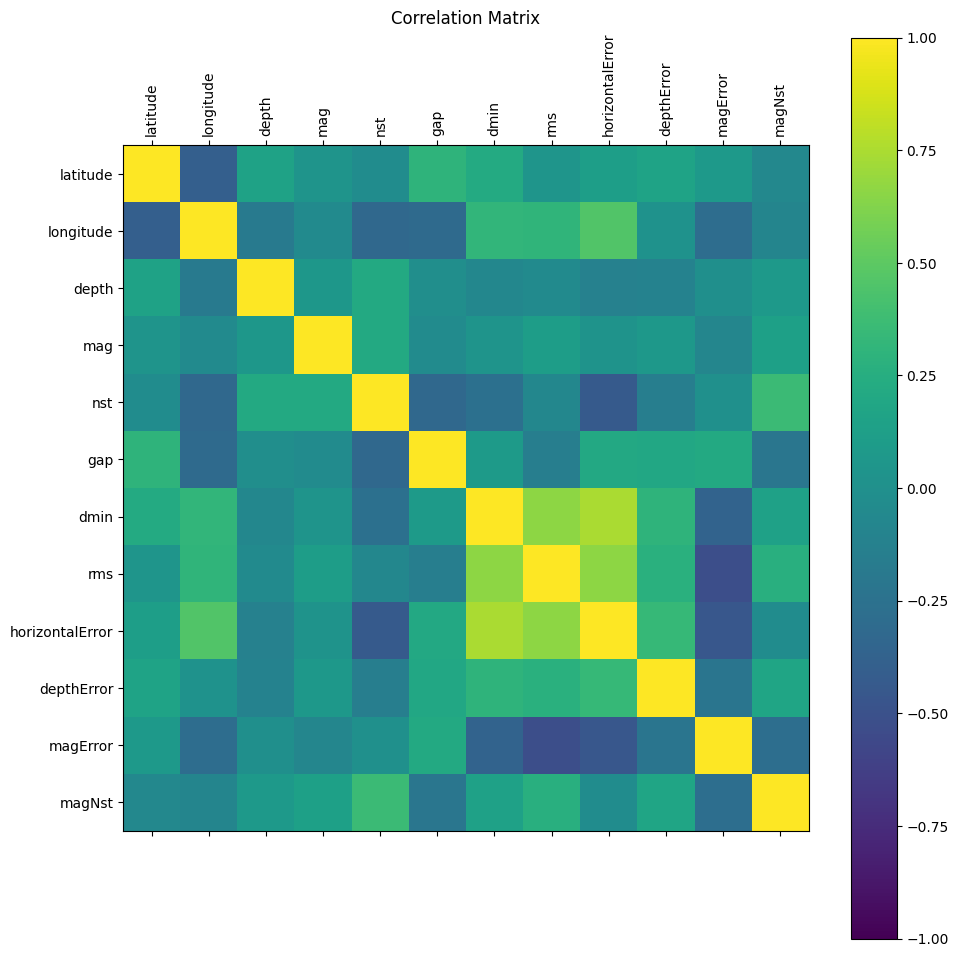

In [19]:
# visualize correlation between features
plot_correlation_matrix(data.select_dtypes(include=[np.number]))

#### Clustering with raw data

This part implements K-means clustering on seismic event data to identify natural groupings in non-dimensionality reduced space. It preprocesses the dataset by handling missing values and standardizing numerical features, then determines the optimal number of clusters using the Elbow method. The implementation visualizes the clustered data in geographical space (longitude vs. latitude) and calculates mean values for each feature across clusters, providing insights into distinct seismic event patterns before any dimensionality reduction is applied.

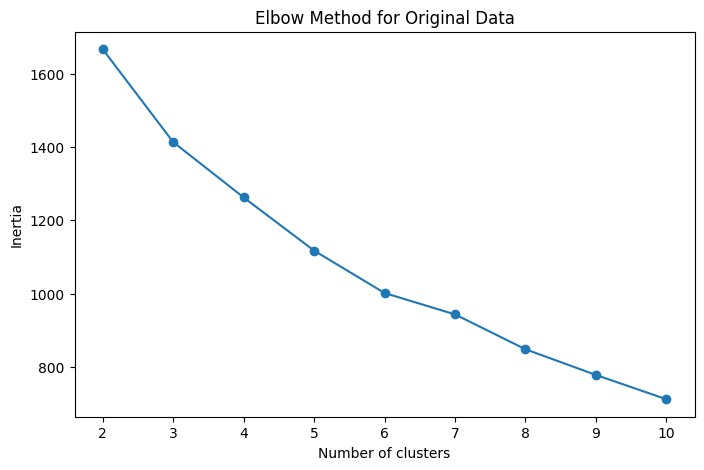

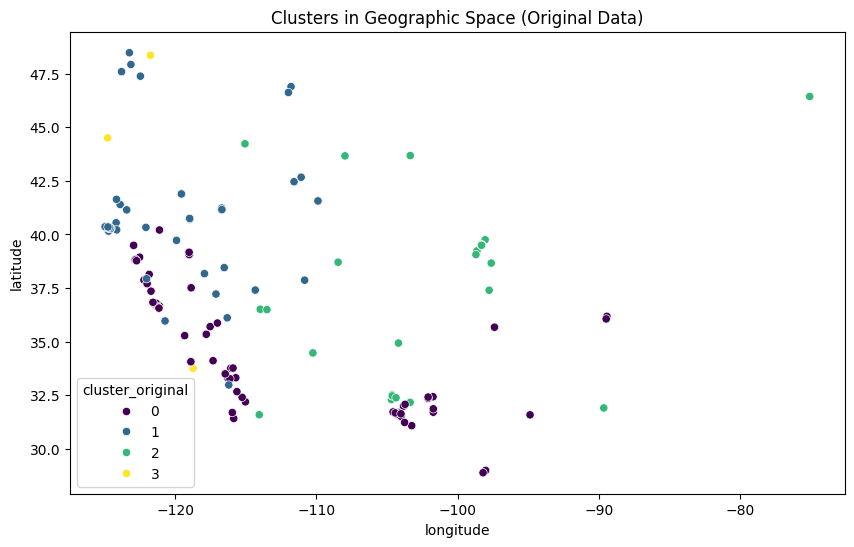

Mean values for each feature in each cluster:
                   latitude   longitude      depth       mag         gap  \
cluster_original                                                           
0                 34.436058 -112.516087   7.837043  2.832143   55.867449   
1                 41.074170 -119.407368  10.672143  2.829821  162.740000   
2                 37.237386 -104.390367   7.810143  2.904762   65.428571   
3                 40.097375 -121.008500   4.275000  3.010000  148.500000   

                      dmin       rms  horizontalError  depthError  magError  \
cluster_original                                                              
0                 0.052521  0.157903         0.449709    0.662447  0.163296   
1                 0.254143  0.179955         0.976364    2.455429  0.203926   
2                 0.749310  0.595000         2.536429    4.791143  0.061619   
3                 0.225025  0.297500         1.285000   29.240000  0.110038   

                      

In [35]:
# Select numerical features for clustering
numerical_features = ['latitude', 'longitude', 'depth', 'mag', 'gap', 'dmin', 'rms', 
                     'horizontalError', 'depthError', 'magError', 'magNst']

# Handle missing values and standardize
data_cleaned = data[numerical_features].fillna(data[numerical_features].mean())
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Find optimal number of clusters
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Original Data')
plt.show()

# Apply KMeans with optimal k
optimal_k = 4  # Adjust based on elbow plot
kmeans_original = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['cluster_original'] = kmeans_original.fit_predict(data_scaled)

# Visualize clusters in geographical space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster_original', data=data, palette='viridis')
plt.title('Clusters in Geographic Space (Original Data)')
plt.show()

# Calculate and display cluster characteristics
cluster_means = data.groupby('cluster_original')[numerical_features].mean()
print("Mean values for each feature in each cluster:")
print(cluster_means)

### Dimensionality Reduction
High-dimensional data can be hard for machine learning models to handle, especially for clustering. In this section, we apply three common dimensionality reduction methods: Principal Component Analysis (PCA), t-distributed Stochastic Neighbor Embedding (t-SNE), and Uniform Manifold Approximation and Projection (UMAP). These techniques reduce the number of features while trying to keep the most important patterns in the data. The reduced data will later be used to test how DBSCAN clustering performs compared to using the original high-dimensional data.

In [13]:
# Drop rows with any missing values
clean_data = data.dropna()

# Scale the cleaned data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_data.select_dtypes(include=[np.number]))


In [14]:
# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(scaled_data)

# Apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
data_umap = reducer.fit_transform(scaled_data)


/opt/anaconda3/envs/keras_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/envs/keras_env/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


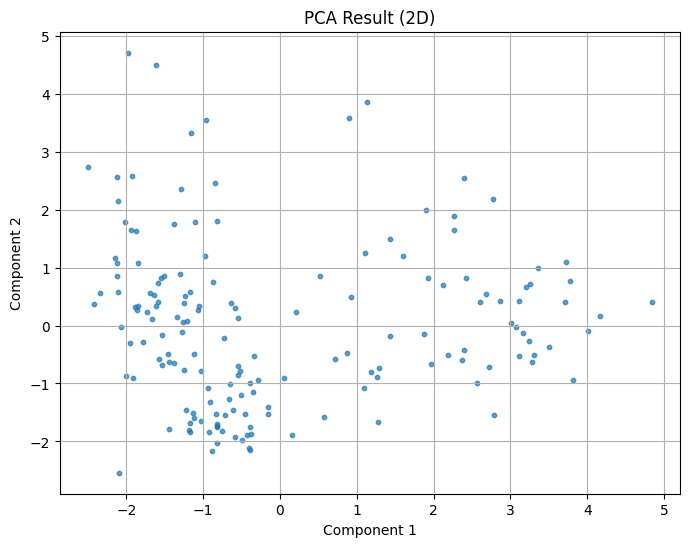

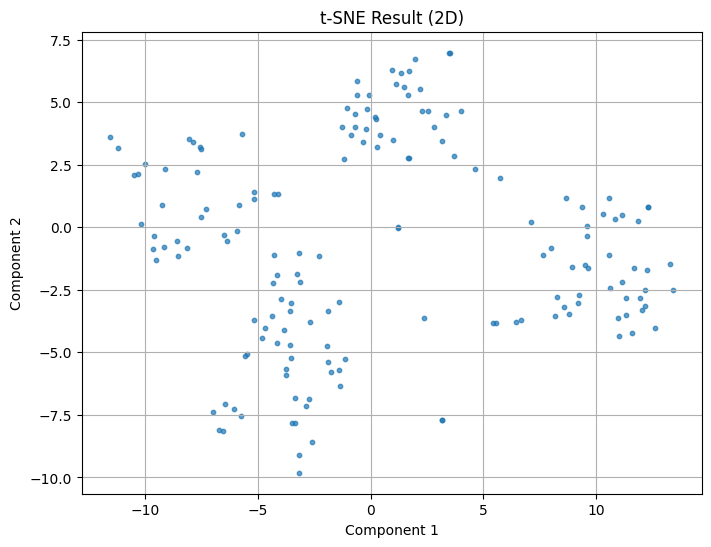

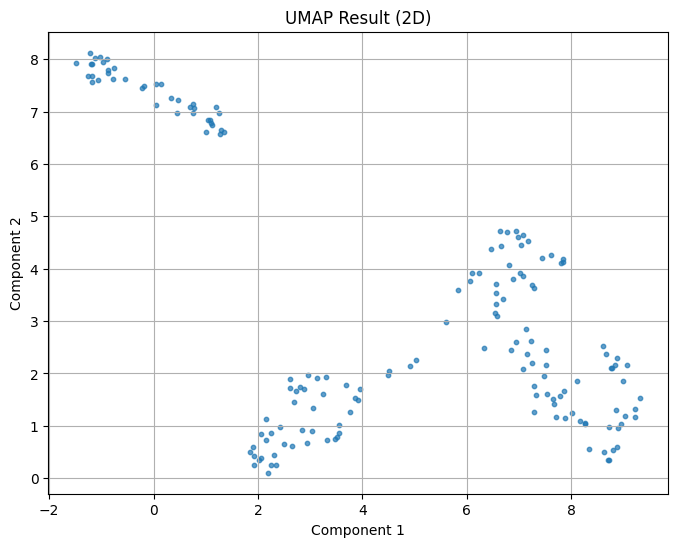

In [18]:
# Plot the reduced data
plot_reduction_result(data_pca, 'PCA Result (2D)')
plot_reduction_result(data_tsne, 't-SNE Result (2D)')
plot_reduction_result(data_umap, 'UMAP Result (2D)')


### DBSCAN Clustering
Now that the data is ready, we apply the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm. DBSCAN is good at finding clusters of different shapes and sizes, and it handles noise well. We test DBSCAN in both the original high-dimensional space and in the lower-dimensional spaces created by PCA, t-SNE, and UMAP. This helps us compare how the curse of dimensionality affects DBSCAN's ability to find patterns, and whether reducing dimensions makes clustering more effective.

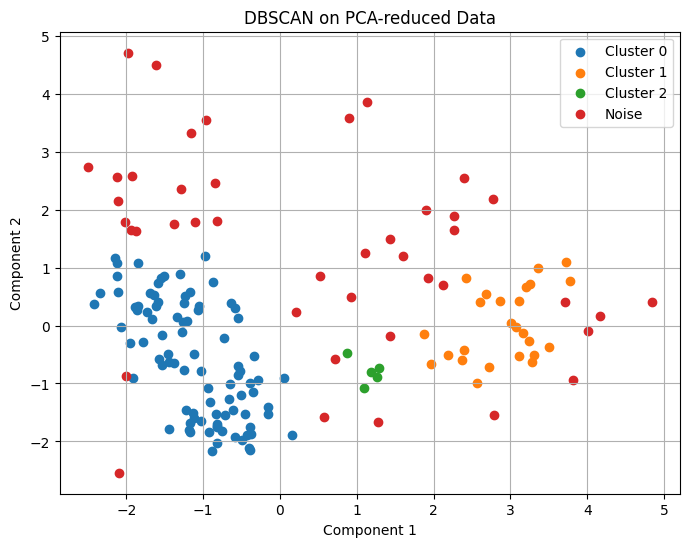

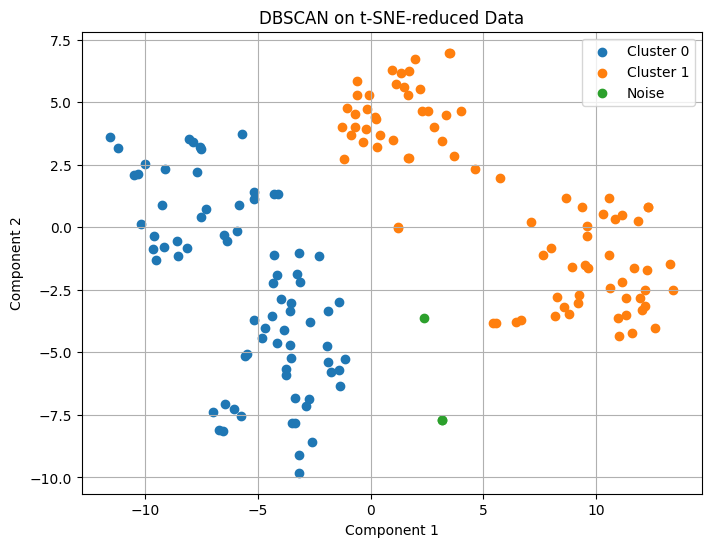

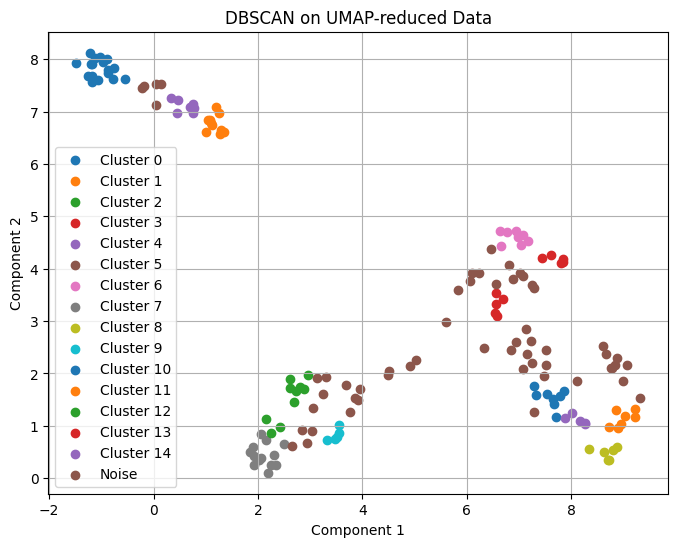

In [20]:
# DBSCAN on original high-dimensional data
dbscan_hd = DBSCAN(eps=1.5, min_samples=5)  # you may tune eps
labels_hd = dbscan_hd.fit_predict(scaled_data)

# DBSCAN on PCA-reduced data
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
labels_pca = dbscan_pca.fit_predict(data_pca)
plot_clusters_2d(data_pca, labels_pca, 'DBSCAN on PCA-reduced Data')

# DBSCAN on t-SNE-reduced data
dbscan_tsne = DBSCAN(eps=3, min_samples=5)
labels_tsne = dbscan_tsne.fit_predict(data_tsne)
plot_clusters_2d(data_tsne, labels_tsne, 'DBSCAN on t-SNE-reduced Data')

# DBSCAN on UMAP-reduced data
dbscan_umap = DBSCAN(eps=0.3, min_samples=5)
labels_umap = dbscan_umap.fit_predict(data_umap)
plot_clusters_2d(data_umap, labels_umap, 'DBSCAN on UMAP-reduced Data')


### Discussion: Clustering Results and Comparison
We applied the DBSCAN clustering algorithm after reducing dimensions using three methods: PCA, t-SNE, and UMAP.

**PCA Result:**

DBSCAN found 3 clear clusters and some noise points. The clusters are somewhat distinct but overlap in some areas. PCA kept the main variance directions, but since it is linear, it might miss some complex patterns.

**t-SNE Result:**

t-SNE created two strong, well-separated clusters with very little noise. It preserved the local structure well, making it easier for DBSCAN to detect patterns. However, t-SNE is not ideal for showing global structure or scaling beyond 2D.

**UMAP Result:**

UMAP led to the highest number of clusters, capturing detailed patterns and separating small local groups. DBSCAN was able to detect many fine-grained clusters, which may be useful in geological feature detection. UMAP appears to be the most sensitive to complex spatial relationships in the data.

### Conclusion and Recommendation
Dimensionality reduction significantly improves DBSCAN’s ability to find meaningful clusters. Among the three methods:

t-SNE is good for visualizing two main groups clearly.
UMAP is best for capturing fine-scale structure and multiscale patterns.
PCA is simpler and still useful, but may miss nonlinear relationships.

### Recommendation: 
1.Apply dimensionality reduction before clustering when working with high-dimensional seismic or subsurface data. This step simplifies the data structure and helps algorithms like DBSCAN work more effectively.

2.Among the techniques tested, UMAP consistently produced the best clustering outcomes, identifying more detailed and meaningful patterns compared to PCA and t-SNE. UMAP is particularly useful when the goal is to detect fine-scale geological features that may be missed in linear or less flexible projections.

3.Use DBSCAN with reduced data to take advantage of its ability to find clusters of arbitrary shapes and handle noise. It is especially suitable for real-world geophysical data where the number of clusters is unknown and data may include outliers.

4.Tune hyperparameters (such as eps and min_samples in DBSCAN) for each reduced dataset, as optimal values vary depending on how the data is transformed. A small grid search or visual inspection can help improve clustering quality.

### Final Summary
In this project, I studied how the curse of dimensionality affects machine learning models by testing DBSCAN clustering on high-dimensional seismic data. To address this challenge, I used dimensionality reduction methods (PCA, t-SNE, and UMAP) to simplify the data before applying DBSCAN. I found that clustering results improved after reducing dimensions, especially with UMAP, which captured many small, meaningful clusters. Based on this study, I recommend using dimensionality reduction, especially UMAP, before clustering complex subsurface datasets to improve accuracy and reveal useful geological patterns.

#### About the Supervising Professor

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)